In [10]:
#導入
# numpy: 用於進行數值計算和數組操作。
# pandas: 用於數據處理和數據分析。
# matplotlib: 用於繪製圖表和資料視覺化。
# seaborn: 也是用於資料視覺化和繪製統計圖表的套件。
# sklearn.preprocessing: 用於數據預處理，例如標準化和歸一化等。
# scipy: 用於科學計算和統計分析。
# scipy.stats: 用於機率分布、統計分析等相關的統計計算。
# warnings: 用於控制警告訊息的輸出，通常是用來屏蔽一些不必要的警告訊息，讓程式執行過程更加乾淨。
#%matplotlib inline顯示matplotlib繪製的圖表
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from scipy import stats
from scipy.stats import norm,skew
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
#讀取訓練數據
train = pd.read_csv(r"C:\Users\ku852\OneDrive\桌面\workspart\房價\train.csv")
print (train)
train.head(5)



        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fe

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [11]:
#讀取測試數據
test = pd.read_csv(r"C:\Users\ku852\OneDrive\桌面\workspart\房價\test.csv")
print (test)
test.head(5)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1461          20       RH         80.0    11622   Pave   NaN      Reg   
1     1462          20       RL         81.0    14267   Pave   NaN      IR1   
2     1463          60       RL         74.0    13830   Pave   NaN      IR1   
3     1464          60       RL         78.0     9978   Pave   NaN      IR1   
4     1465         120       RL         43.0     5005   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities  ... ScreenPorch PoolAre

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [12]:
#用pandas觀察MSZoning文字特徵
train['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

<Axes: >

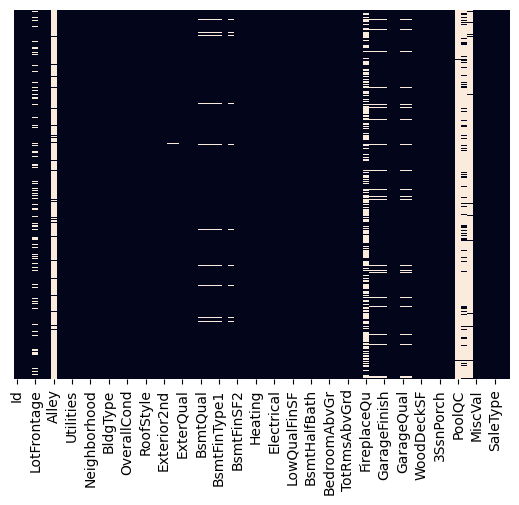

In [13]:
#isnull()看數據缺失值
# yticklabels=False 和 cbar=False 表示去掉熱力圖的 y 軸標籤和顏色條
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

In [14]:
#看數據維度
print(train.shape)
#看數據訊息
train.info()

(1460, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 1

In [15]:
#看數據維度
print(test.shape)
#看數據訊息
test.info()

(1459, 80)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 1

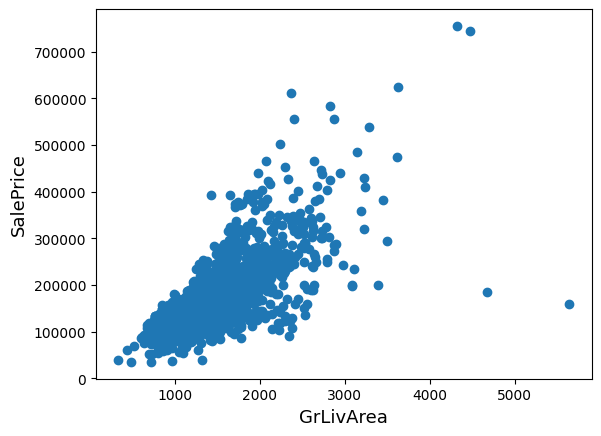

In [16]:
fig, ax = plt.subplots()  #fig表示新創建的數字(Figure)對象，ax表示新創建的子圖(subplot)
ax.scatter(x = train['GrLivArea'],y = train['SalePrice'])   #繪製點散圖
plt.ylabel('SalePrice',fontsize = 13)   #fontsize = 13 字體大小
plt.xlabel('GrLivArea',fontsize = 13)
plt.show()

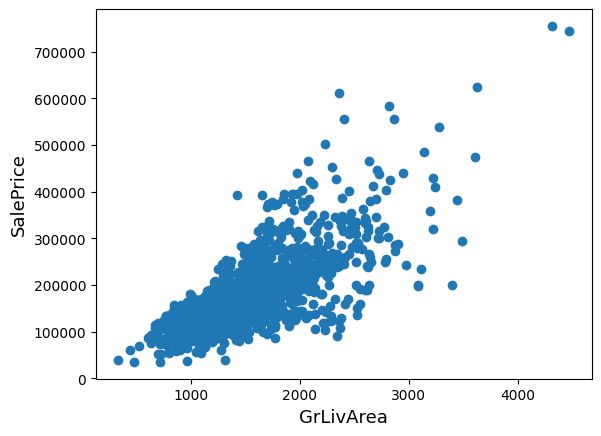

In [17]:
#異常值處理
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice',fontsize = 13)   #fontsize = 13 字體大小
plt.xlabel('GrLivArea',fontsize = 13)
plt.show()


mu = 180932.92 and sigma = 79467.79



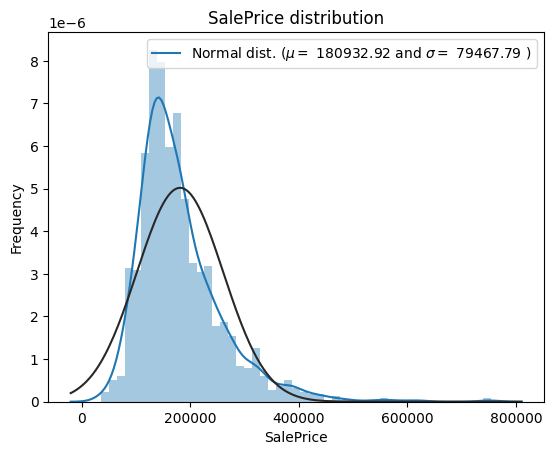

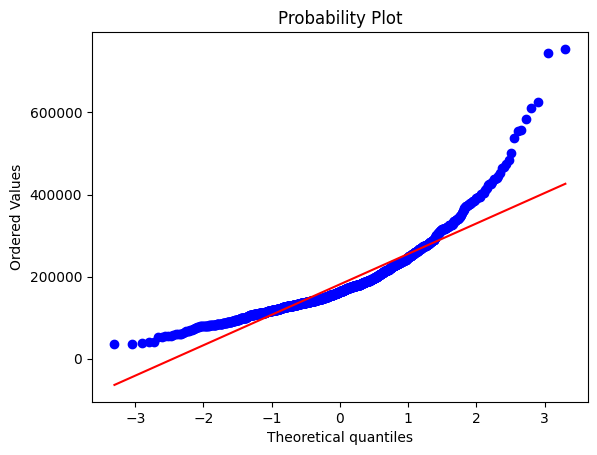

In [18]:
#分析目標變量'SalePrice'的分布，計算均值與標準差
sns.distplot(train['SalePrice'] , fit=norm);  #sns.distplot用於繪製一個變量的概率密度函數(PDF)和核密度估計(KDE)

(mu, sigma) = norm.fit(train['SalePrice'])  #norm.fit對SalePrice變量進行最大似然估計(MLE)，mu:正態分布的均值，sigma:態分布的標準差。
print('\nmu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma)) #\n換行，{:.2f}是一個格式化字符串，會被替換為mu和sigma的值，以保留兩位小數輸出。

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],  #plt.legend用於給圖標添加圖例，
            loc='best')  #loc='best' 將圖例放置在當前圖形最佳位置，避免遮擋數據
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()   #創建一個新的圖形窗口
res = stats.probplot(train['SalePrice'], plot=plt)  #res表示用於比較的理論分佈，stats.probplot為一個概率圖函數，繪製數據樣本分佈與理論分佈之間的比較。
plt.show()


 mu = 12.02 and sigma = 0.40



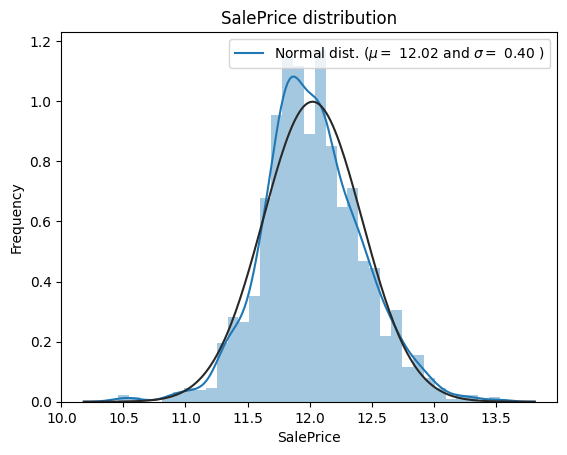

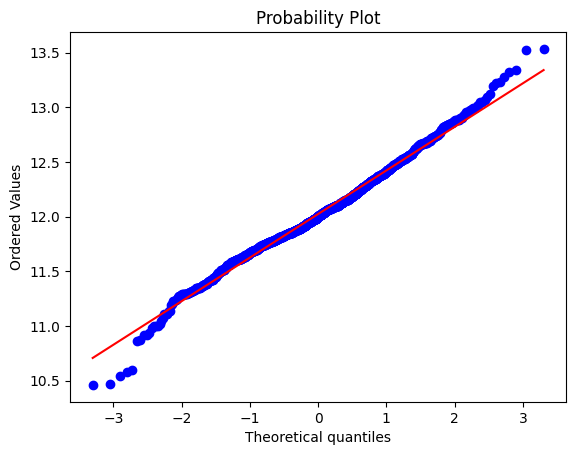

In [19]:
# log對數變換
train["SalePrice"] = np.log1p(train["SalePrice"])  #np.log1p函數將()變量中的所有值都加上1，然後取對數。可以有效的消除數據中的偏度和峰度。使其更接近正態分佈。

sns.distplot(train['SalePrice'] , fit=norm); 
 
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
 
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

In [20]:
#儲存ID
train_Id = train['Id']
test_Id = test['Id']

#刪除ID
train.drop(['Id'],axis=1,inplace=True)  #axis表示沿著行或列的方向進行，0為列(縱向)，1為行(橫向)。
test.drop(['Id'],axis=1,inplace=True)   #inplace=True表示在原有的DataFrame上進行修改。

#查看列名
print(train.columns)   #.columns是Pandas DataFrame 的屬性，可以返回 DataFrame 的所有列名。
print(test.columns)


Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [21]:
#訓練集和測試集行數
ntrain = train.shape[0]
ntest = test.shape[0]
#以訓練集"SalePrice"作為目標變量y_train 
y_train = train.SalePrice.values      #.values是一個Pandas DataFrame 的屬性，可以返回 DataFrames 中所有數據的 Numpy 數組
#合併訓練集和測試集
all_data = pd.concat((train, test)).reset_index(drop=True)   #pd.concat將多個Pandas對象進行連接 可以通過 axis參數指定行或列，0為行，1為列。reset_index重製 DataFrames或 Series索引列，原來的索引會被轉化為一列新的數據列，並重新生成默認的數字索引。drop=True表示丟棄原有的索引列，僅重置數字索引。
all_data.drop(['SalePrice'], axis=1 , inplace=True)
print("all_data size is : {}".format(all_data.shape))


all_data size is : (2917, 79)


      MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0             60       RL         65.0     8450   Pave   NaN      Reg   
1             20       RL         80.0     9600   Pave   NaN      Reg   
2             60       RL         68.0    11250   Pave   NaN      IR1   
3             70       RL         60.0     9550   Pave   NaN      IR1   
4             60       RL         84.0    14260   Pave   NaN      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
2912         160       RM         21.0     1936   Pave   NaN      Reg   
2913         160       RM         21.0     1894   Pave   NaN      Reg   
2914          20       RL        160.0    20000   Pave   NaN      Reg   
2915          85       RL         62.0    10441   Pave   NaN      Reg   
2916          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities LotConfig  ... ScreenPorch PoolArea PoolQC  Fence  \
0            Lvl    AllPub    Inside  ...  

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


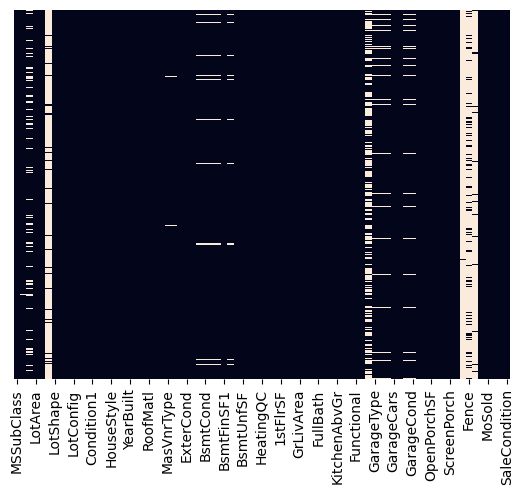

In [22]:
#再次isnull()看數據缺失值
sns.heatmap(all_data.isnull(),yticklabels=False,cbar=False)

print (all_data)
all_data.head(5)

In [23]:
# #熱圖查看數據相關性
# corrmat = train.corr()
# plt.subplots(figsize=(12,9))
# sns.heatmap(corrmat, vmax=0.9, square=True)

<Axes: >

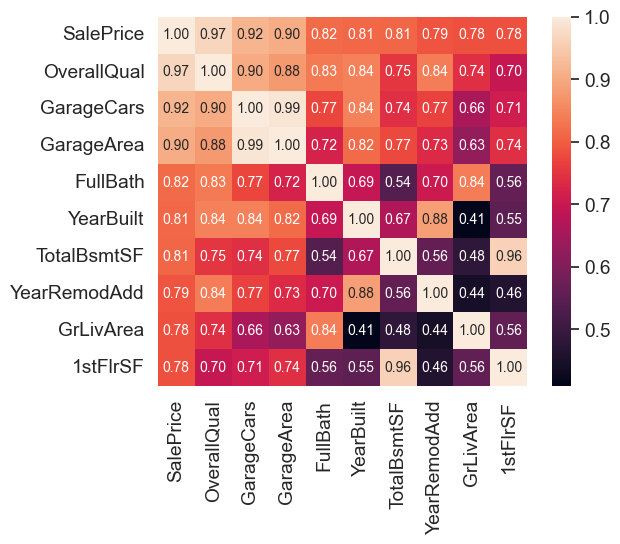

In [24]:
#熱圖查看數據相關性，取相關係數前10高
k = 10
corrmat = train.corr()
cols = corrmat.corr().nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(corrmat[cols].values.T)
sns.set(font_scale=1.25)
sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10},
            yticklabels=cols.values, xticklabels=cols.values)


      MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0             60       RL         65.0     8450   Pave  None      Reg   
1             20       RL         80.0     9600   Pave  None      Reg   
2             60       RL         68.0    11250   Pave  None      IR1   
3             70       RL         60.0     9550   Pave  None      IR1   
4             60       RL         84.0    14260   Pave  None      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
2912         160       RM         21.0     1936   Pave  None      Reg   
2913         160       RM         21.0     1894   Pave  None      Reg   
2914          20       RL        160.0    20000   Pave  None      Reg   
2915          85       RL         62.0    10441   Pave  None      Reg   
2916          60       RL         74.0     9627   Pave  None      Reg   

     LandContour LotConfig LandSlope  ... ScreenPorch PoolArea PoolQC  Fence  \
0            Lvl    Inside       Gtl  ...  

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,Gtl,...,0,0,None,None,None,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,Gtl,...,0,0,None,None,None,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,Gtl,...,0,0,None,None,None,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,Gtl,...,0,0,None,None,None,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,FR2,Gtl,...,0,0,None,None,None,0,12,2008,WD,Normal


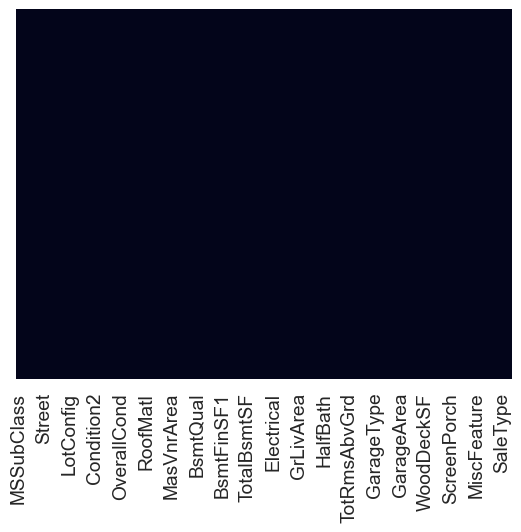

In [25]:
#將缺失值填充None
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")
for col in ('Alley','Fence','FireplaceQu','GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','MasVnrType'):
    all_data[col] = all_data[col].fillna('None')
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")
#將缺失值填充0
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath','MasVnrArea'):
    all_data[col] = all_data[col].fillna(0)
#以 "Neighborhood" 分組內的 "LotFrontage" 中位數填充 "LotFrontage" 內的缺失值
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))
#以最常出現的值填充缺失值
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])
for col in ('Electrical','KitchenQual','Exterior1st','Exterior2nd','SaleType'):
    all_data[col] = all_data[col].fillna(all_data[col].mode()[0])
all_data["Functional"] = all_data["Functional"].fillna("Typ")
#刪除無用數據
all_data = all_data.drop(['Utilities'], axis=1)

#再次isnull()看數據缺失值
sns.heatmap(all_data.isnull(),yticklabels=False,cbar=False)

print (all_data)
all_data.head(5)

In [26]:
#房屋類別數值轉換成字串
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)
 
#整體狀況數值轉換成字串
all_data['OverallCond'] = all_data['OverallCond'].astype(str)
  
#出售年份及月份數值轉換成字串
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [27]:
#對分類變量編碼
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

    
 
#查看數據維度        
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2917, 78)


In [28]:
#轉換成虛擬變數
all_dummy_data = pd.get_dummies(all_data)
all_dummy_data.head()

,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,10,65.0,8450,1,1,3,0,7,4,2003,...,0,0,0,1,0,0,0,0,1,0
1,5,80.0,9600,1,1,3,0,6,7,1976,...,0,0,0,1,0,0,0,0,1,0
2,10,68.0,11250,1,1,0,0,7,4,2001,...,0,0,0,1,0,0,0,0,1,0
3,11,60.0,9550,1,1,0,0,7,4,1915,...,0,0,0,1,1,0,0,0,0,0
4,10,84.0,14260,1,1,0,0,8,4,2000,...,0,0,0,1,0,0,0,0,1,0


In [29]:
#數值型數據
numeric_cols = all_data.columns[all_data.dtypes !='object']
numeric_cols

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape',
       'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'CentralAir',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'PoolQC', 'Fence', 'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [30]:
#標準化:（X-X'）/S  進行數據轉換  X 為原始值，X' 為平均值，S 為標準差
numeric_cols_mean =all_dummy_data.loc[: ,numeric_cols].mean() # mean() 函式計算數值型特徵的平均值
numeric_cols_std = all_dummy_data.loc[: ,numeric_cols].std() #std() 函式計算數值型特徵的標準差
all_dummy_data.loc[: ,numeric_cols] = (all_dummy_data.loc[: ,numeric_cols] - numeric_cols_mean)/numeric_cols_std #轉換後的數值型特徵資料儲存在 all_dummy_data 變數中

In [31]:
all_dummy_data = pd.get_dummies(all_dummy_data)
print(all_dummy_data)
#拆分訓練集和驗證集
dummy_train_df = all_dummy_data[:ntrain]
dummy_test_df = all_dummy_data[ntrain:]

print(dummy_train_df.shape)
print(dummy_test_df.shape)
print(y_train.shape)

      MSSubClass  LotFrontage   LotArea   Street    Alley  LotShape  \
0       0.775232    -0.209167 -0.216400  0.06426  0.05534  0.746069   
1      -0.576443     0.498105 -0.069097  0.06426  0.05534  0.746069   
2       0.775232    -0.067713  0.142251  0.06426  0.05534 -1.381979   
3       1.045567    -0.444924 -0.075501  0.06426  0.05534 -1.381979   
4       0.775232     0.686711  0.527801  0.06426  0.05534 -1.381979   
...          ...          ...       ...      ...      ...       ...   
2912   -1.387448    -2.283832 -1.050775  0.06426  0.05534  0.746069   
2913   -1.387448    -2.283832 -1.056155  0.06426  0.05534  0.746069   
2914   -0.576443     4.270224  1.263035  0.06426  0.05534  0.746069   
2915    1.856572    -0.350621  0.038627  0.06426  0.05534  0.746069   
2916    0.775232     0.215196 -0.065638  0.06426  0.05534  0.746069   

      LandSlope  OverallQual  OverallCond  YearBuilt  ...  SaleType_ConLw  \
0     -0.216301     0.649468    -0.507416   1.047051  ...             

In [32]:
#導入
from sklearn.linear_model import ElasticNet, Lasso, BayesianRidge, LassoLarsIC, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold,cross_val_score,train_test_split,cross_val_predict
from sklearn.metrics import mean_squared_error,mean_absolute_error
import xgboost as xgb
import lightgbm as lgb


In [33]:
#交叉驗證
n_folds = 5
#RMSE
def rmsle_cv(model) :
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse = np.sqrt(-cross_val_score(model, dummy_train_df.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)
#MAE
def mae_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    mae = -cross_val_score(model, dummy_train_df.values, y_train, scoring="neg_mean_absolute_error", cv = kf)
    return(mae)
#MAPE
def mape_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    y_pred = cross_val_predict(model, dummy_train_df.values, y_train, cv=kf)
    mape = np.mean(np.abs((y_train - y_pred) / y_train)) * 100
    return(mape)

In [34]:
#Lasso
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005,random_state=1))

In [35]:
#ENet
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

In [36]:
#KRR
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree= 2,coef0=2.5)

In [37]:
#梯度提升
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10,
                                   loss='huber', random_state=5)
# 樹的數量（n_estimators）
# 學習率（learning_rate）
# 樹的最大深度（max_depth）
# 特徵的最大數量（max_features）
# 每個葉子節點最小樣本數（min_samples_leaf）
# 節點分裂所需最小樣本數（min_samples_split）
# 損失函數（loss）

In [38]:
#XGB
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.4608,
                             learning_rate=0.05, max_depth=3,
                             min_child_weight=1.7817,n_estimators=2200,
                             subsample=0.5213,silent=1,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             random_state=7, nthread=-1)
# colsamples_bytree 是列的採樣率
# gamma 是節點劃分所需的最小損失減少值
# learning_rate 是每次迭代的步長大小
# max_depth 是樹的最大深度
# min_child_weight 是子節點所需最小樣本數
# n_estimators 是樹的數量
# subsample 是行的採樣率
# reg_alpha 和 reg_lambda 是 L1 和 L2 正則化項的權重
# random_state 是隨機種子
# nthread 是 CPU 的使用數量

In [39]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [40]:
#Lasso MAE得分
score_mae = mae_cv(lasso)
print("\nLasso MAE score: {:.4f} ({:.4f})\n".format(score_mae.mean(), score_mae.std()))



Lasso MAE score: 0.0795 (0.0021)



In [41]:
#Lasso MAPE得分
score_mape = mape_cv(lasso)
print("\nLasso MAPE score: {:.4f}%\n".format(score_mape))


Lasso MAPE score: 0.6666%



In [42]:
#Lasso RMSE得分
score = rmsle_cv(lasso)
print("\nLsso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lsso score: 0.1126 (0.0064)



In [43]:
#ENet MAE得分
score_mae = mae_cv(ENet)
print("\nLasso MAE score: {:.4f} ({:.4f})\n".format(score_mae.mean(), score_mae.std()))


Lasso MAE score: 0.0795 (0.0022)



In [44]:
#ENet MAPE得分
score_mape = mape_cv(ENet)
print("\nLasso MAPE score: {:.4f}%\n".format(score_mape))


Lasso MAPE score: 0.6665%



In [45]:
#ENet RMSE得分
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.1126 (0.0066)



In [46]:
#KRR MAE得分
score_mae = mae_cv(KRR)
print("\nLasso MAE score: {:.4f} ({:.4f})\n".format(score_mae.mean(), score_mae.std()))


Lasso MAE score: 0.0770 (0.0019)



In [47]:
#KRR MAPE得分
score_mape = mape_cv(KRR)
print("\nLasso MAPE score: {:.4f}%\n".format(score_mape))


Lasso MAPE score: 0.6458%



In [48]:
#KRR RMSE得分
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.1115 (0.0057)



In [49]:
#GBoost MAE得分
score_mae = mae_cv(GBoost)
print("\nLasso MAE score: {:.4f} ({:.4f})\n".format(score_mae.mean(), score_mae.std()))


Lasso MAE score: 0.0805 (0.0030)



In [50]:
#GBoost MAPE得分
score_mape = mape_cv(GBoost)
print("\nLasso MAPE score: {:.4f}%\n".format(score_mape))


Lasso MAPE score: 0.6744%



In [51]:
#GBoost RMSE得分
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.1177 (0.0080)



In [52]:
#XGBoost MAE得分
score_mae = mae_cv(model_xgb)
print("\nLasso MAE score: {:.4f} ({:.4f})\n".format(score_mae.mean(), score_mae.std()))

[00:06:36] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[00:06:40] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[00:06:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[00:06:48] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[00:06:53] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.


Lasso MAE score: 0.

In [53]:
#XGBoost MAPE得分
score_mape = mape_cv(model_xgb)
print("\nLasso MAPE score: {:.4f}%\n".format(score_mape))

[00:07:02] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[00:07:10] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[00:07:17] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[00:07:24] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[00:07:30] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.


Lasso MAPE score: 0

In [54]:
#XGB RMSE得分
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

[00:07:33] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[00:07:37] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[00:07:40] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[00:07:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[00:07:47] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

Xgboost score: 0.136

In [55]:
#LightGB MAE得分
score_mae = mae_cv(model_lgb)
print("\nLasso MAE score: {:.4f} ({:.4f})\n".format(score_mae.mean(), score_mae.std()))

[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11

In [56]:
#LightGB MAPE得分
score_mape = mape_cv(model_lgb)
print("\nLasso MAPE score: {:.4f}%\n".format(score_mape))

[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11

In [57]:
#LightGB RMSE得分
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11

In [58]:
#集成模型
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # 初始化函數，將傳入的模型列表保存為類的属性
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # 使用新的模型對數據進行訓練
        for model in self.models_:
            model.fit(X, y)
 
        return self
    
    #對新的模型進行預測，並將預測結果進行均值計算，作為最終結果
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)  

In [70]:
#集成模型 MAE得分
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

score_mae = mae_cv(averaged_models)
print("\nLasso MAE score: {:.4f} ({:.4f})\n".format(score_mae.mean(), score_mae.std()))


Lasso MAE score: 0.0749 (0.0015)



In [71]:
#集成模型 MAPE得分
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

score_mape = mape_cv(averaged_models)
print("\nLasso MAPE score: {:.4f}%\n".format(score_mape))


Lasso MAPE score: 0.6285%



In [72]:
#集成模型 RMSE得分
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))
 
score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


 Averaged base models score: 0.1090 (0.0064)



In [73]:
# 堆疊平均模型
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        # 初始化成員變數
        self.base_models = base_models # 基本模型列表
        self.meta_model = meta_model # 元模型
        self.n_folds = n_folds # 交叉驗證折數
   
    # 訓練模型
    def fit(self, X, y):
        # 對每個基本模型創建多個實例
        self.base_models_ = [list() for x in self.base_models]
        # 複製元模型的實例
        self.meta_model_ = clone(self.meta_model)
        # 創建 k 折交叉驗證器
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # 對每個基本模型進行交叉驗證，得到預測結果作為新特徵
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                # 複製基本模型的實例
                instance = clone(model)
                # 把實例添加到列表中
                self.base_models_[i].append(instance)
                # 訓練基本模型
                instance.fit(X[train_index], y[train_index])
                # 預測驗證集
                y_pred = instance.predict(X[holdout_index])
                # 把預測結果添加到新特徵中
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # 使用新特徵訓練元模型
        self.meta_model_.fit(out_of_fold_predictions, y)
        # 返回模型本身
        return self
   
    # 預測測試集
    def predict(self, X):
        # 對每個基本模型進行預測，並將預測結果取平均值作為新特徵
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        # 使用元模型對新特徵進行預測
        return self.meta_model_.predict(meta_features)

In [74]:
#堆疊平均模型 MAE得分
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = lasso)
 
score_mae = mae_cv(stacked_averaged_models)
print("\nLasso MAE score: {:.4f} ({:.4f})\n".format(score_mae.mean(), score_mae.std()))


Lasso MAE score: 0.0744 (0.0017)



In [75]:
#堆疊平均模型 MAPE得分
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = lasso)

score_mape = mape_cv(stacked_averaged_models)
print("\nLasso MAPE score: {:.4f}%\n".format(score_mape))


Lasso MAPE score: 0.6239%



In [76]:
#堆疊平均模型 RMSE得分
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = lasso)
 
score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))


Stacking Averaged models score: 0.1086 (0.0065)


In [77]:
#集成StackedRegressor，XGBoost和LightGBM，定義一個MAE函數

def mae(y, y_pred):
    return mean_absolute_error(y, y_pred)

#集成StackedRegressor，XGBoost和LightGBM，定義一個MAPE函數

def mape(y, y_pred):
    return np.mean(np.abs((y - y_pred) / y)) * 100

#集成StackedRegressor，XGBoost和LightGBM，定義一個RMSL函數

def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [78]:
# 訓練及預測
stacked_averaged_models.fit(dummy_train_df.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(dummy_train_df.values)
stacked_pred = np.expm1(stacked_averaged_models.predict(dummy_test_df.values))
# 計算MAE
mae = mean_absolute_error(y_train, stacked_train_pred)
print("MAE:", mae)

# 計算MAPE
mape = np.mean(np.abs((y_train - stacked_train_pred) / y_train)) * 100
print("MAPE:", mape)

# 計算RMSLE
print("RMSLE:", rmsle(y_train, stacked_train_pred))


MAE: 0.0516980546968751
MAPE: 0.4340619462757139
RMSLE: 0.07808001278618032


In [68]:
#計算xgboost
model_xgb.fit(dummy_train_df, y_train)
xgb_train_pred = model_xgb.predict(dummy_train_df)
xgb_pred = np.expm1(model_xgb.predict(dummy_test_df))
# 計算MAE
mae = mean_absolute_error(y_train, xgb_train_pred)
print("MAE:", mae)

# 計算MAPE
mape = np.mean(np.abs((y_train - xgb_train_pred) / y_train)) * 100
print("MAPE:", mape)

# 計算RMSLE
print("RMSLE:", rmsle(y_train, xgb_train_pred))

[00:09:01] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

MAE: 0.08478385541721291
MAPE: 0.7085218797805094
RMSLE: 0.11823180029657501


In [69]:
#計算LightGBM
model_lgb.fit(dummy_train_df, y_train)
lgb_train_pred = model_lgb.predict(dummy_train_df)
 
lgb_pred = np.expm1(model_lgb.predict(dummy_test_df.values))
# 計算MAE
mae = mean_absolute_error(y_train, xgb_train_pred)
print("MAE:", mae)

# 計算MAPE
mape = np.mean(np.abs((y_train - xgb_train_pred) / y_train)) * 100
print("MAPE:", mape)

# 計算RMSLE
print("RMSLE:", rmsle(y_train, lgb_train_pred))


[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
MAE: 0.08478385541721291
MAPE: 0.7085218797805094
RMSLE: 0.07245705275601737
